# Greg

In [77]:
import numpy as np
import pandas as pd

import seaborn as sns

import sqlite3
from zipfile import ZipFile

## Box Office Mojo

In [72]:
box_office_mojo = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [73]:
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [74]:
box_office_mojo[box_office_mojo['foreign_gross'].isnull() == True]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [77]:
box_office_mojo = box_office_mojo.fillna(0)
box_office_mojo['domestic_gross']= box_office_mojo['domestic_gross'].astype(float)
box_office_mojo['foreign_gross'] = box_office_mojo['foreign_gross'].str.replace(",","").astype(float)
box_office_mojo['total_gross'] = box_office_mojo['domestic_gross'] + box_office_mojo['foreign_gross']

In [78]:
box_office_gross_mean = box_office_mojo['total_gross'].mean()
box_office_gross_med = box_office_mojo['total_gross'].median()
box_office_gross_std = box_office_mojo['total_gross'].std()

In [79]:
print(box_office_gross_mean)
box_office_gross_med

121200245.98011783


41500000.0

In [11]:
def z_score(value, mean, std):
    return (value - mean) / std

In [81]:
box_office_mojo['mod_z_score'] = box_office_mojo['total_gross'].apply(lambda x: mod_z_score(x, box_office_gross_mean, box_office_gross_std))

In [82]:
box_office_mojo[box_office_mojo['mod_z_score'] > 3]

,title,studio,domestic_gross,foreign_gross,year,total_gross,mod_z_score
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,4.580728
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,4.379734
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,4.063955
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,3.424648
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,3.058016
...,...,...,...,...,...,...,...
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09,4.972061
3084,Bohemian Rhapsody,Fox,216400000.0,687200000.0,2018,9.036000e+08,3.789344
3085,Venom (2018),Sony,213500000.0,641500000.0,2018,8.550000e+08,3.553963
3086,Mission: Impossible - Fallout,Par.,220200000.0,571000000.0,2018,7.912000e+08,3.244965


## Rotten Tomatoes

In [12]:
rot_tomatoes_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rot_tomatoes_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
rot_tomatoes_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [48]:
rot_tomatoes_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', 
                                   encoding= 'unicode_escape')
rot_tomatoes_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [49]:
rot_tomatoes_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## TMDB

In [10]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## The Numbers

In [31]:
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
the_numbers.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [33]:
def make_int(string):
    return int(string.replace("$","").replace(",",""))

In [34]:
the_numbers['production_budget'] = the_numbers['production_budget'].apply(lambda x: make_int(x))
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].apply(lambda x: make_int(x))
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].apply(lambda x: make_int(x))

In [35]:
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [39]:
the_numbers_mean = the_numbers['worldwide_gross'].mean()
the_numbers_med = the_numbers['worldwide_gross'].median()
the_numbers_std = the_numbers['worldwide_gross'].std()

print(the_numbers_mean)
print(the_numbers_med)

the_numbers['z_score'] = the_numbers['worldwide_gross'].apply(lambda x: z_score(x, the_numbers_mean, the_numbers_std))

91487460.90643376
27984448.5


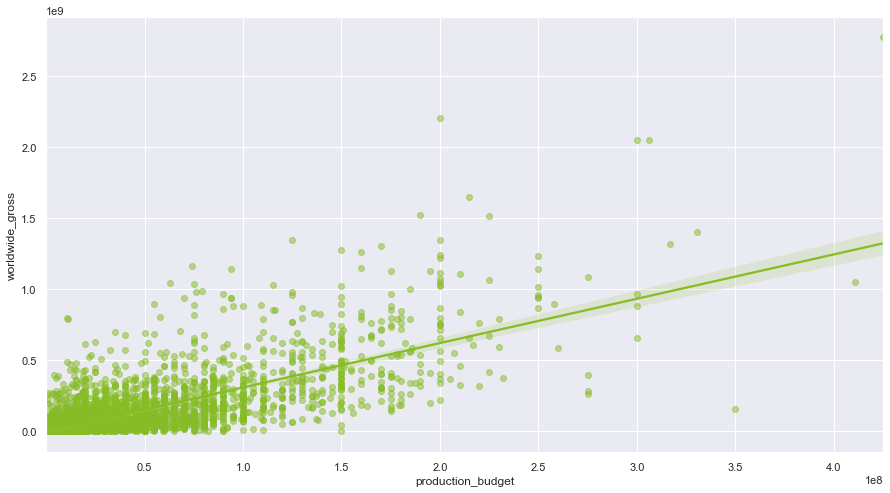

In [97]:
enmax_palette = ["#86BC25"]
sns.set_palette(palette=enmax_palette)

sns.regplot(data=the_numbers, x='production_budget', y='worldwide_gross', 
            scatter_kws={'alpha':0.5})
sns.set(rc={'figure.figsize':(15,8)})

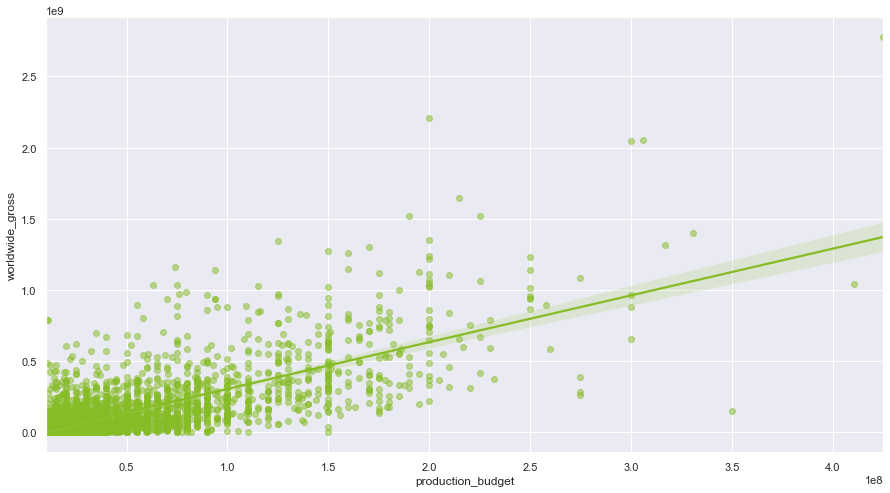

In [101]:
over_one_mil = the_numbers[the_numbers['production_budget'] > 10000000]
sns.set_palette(palette=enmax_palette)
sns.regplot(data=over_one_mil, x='production_budget', y='worldwide_gross', 
            scatter_kws={'alpha':0.5})
sns.set(rc={'figure.figsize':(15,8)})

In [40]:
the_numbers[the_numbers['movie'] == 'Avatar']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,z_score
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,15.366634


In [55]:
gross_outliers = the_numbers[the_numbers['z_score'] > 3]
outliers_movies_lst = list(gross_outliers['movie'].values)
outliers_movies_lst

['Avatar',
 'Pirates of the Caribbean: On Stranger Tides',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Justice League',
 'Spectre',
 'The Dark Knight Rises',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Batman v Superman: Dawn of Justice',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'The Fate of the Furious',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'The Avengers',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Man of Steel',
 'The Amazing Spider-Man',
 'Jurassic World',
 'Men in Black 3',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Black Panther',
 'Titanic',
 'Incredibles 2',
 'Rogue One: A Star Wars Story',
 'Finding Dory',
 'Toy Story 3',
 'Iron Man 3',
 'G

## SQL

In [47]:
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    #zip.printdir()
    zip.extractall()
conn = sqlite3.connect('./im.db')


In [ ]:
SELECT personid, primary_name, death_year, category 
FROM persons p
JOIN prinicipals 

In [59]:
imdb = pd.read_sql(f"""
SELECT pr.person_id, primary_name, death_year, category, primary_title,
       original_title
FROM persons p
LEFT JOIN principals pr ON pr.person_id = p.person_id
LEFT JOIN movie_basics mb ON pr.movie_id = mb.movie_id
""", conn)

In [75]:
imdb = imdb[imdb['death_year'].isnull() == True]
imdb_outliers = imdb[imdb['primary_title'].isin(outliers_movies_lst)]
display(imdb_outliers)
#grouped = imdb_outliers.groupby(['category','primary_name']).size().reset_index(name='counts')
grouped[grouped['counts'] > 1]

,person_id,primary_name,death_year,category,primary_title,original_title
480,nm0125336,Jez Butterworth,NaN,writer,Spectre,Spectre
2286,nm0671567,Michael Peña,NaN,actor,Ant-Man and the Wasp,Ant-Man and the Wasp
2797,nm0834902,Robert Stromberg,NaN,director,Maleficent,Maleficent
2799,nm0837112,Richard Suckle,NaN,producer,Suicide Squad,Suicide Squad
3273,nm1014201,Rhett Reese,NaN,writer,Deadpool,Deadpool
...,...,...,...,...,...,...
1005549,nm9989238,Suneet Gautam,NaN,composer,Titanic,Titanic
1009487,nm9989231,Mahesh Vashisht,NaN,composer,Titanic,Titanic
1013926,nm9039216,Neil Boultby,NaN,actor,Coco,Coco
1029087,nm9061881,Natalia Kaverznikova,NaN,actress,Coco,Coco


,category,primary_name,counts
5,actor,Andrew Garfield,2
8,actor,Andy Serkis,2
12,actor,Ben Affleck,2
19,actor,Benjamin Bratt,2
29,actor,Chiwetel Ejiofor,2
...,...,...,...
705,writer,Stephen McFeely,4
708,writer,Stuart Beattie,2
709,writer,Suzanne Collins,4
710,writer,Ted Elliott,3


In [ ]:
#Notes 

#Scatterplot Between Domestic Gross and Production Budget 
#Bar Plot of Most Occuring Actor 

#Hypothesis Testing 

# James

# Han

# Rachel

# Himansri